In [29]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import decks

In [31]:
df = pd.read_csv("carer.csv", index_col=0)
df

,text,emotions,split
0,im actually scared to live here sometimes i al...,2,0
1,i leave school feeling beaten and battered,4,0
2,i think anyone who s ever been in a room full ...,4,0
3,i feel ok and i feel happy for the team to get...,2,0
4,im having a bit of a hectic morning over here ...,0,0
...,...,...,...
416804,i tried to ignore it tried to push through and...,4,2
416805,i feel kinda blank and kinda jealous of the tw...,4,2
416806,i guess on days when im feeling mentally distr...,0,2
416807,im feeling very confident in my predictions fo...,2,2


In [48]:
df["emotions"].value_counts()

2    138411
4    119358
0     56719
1     47306
3     33997
5     14763
Name: emotions, dtype: int64

In [32]:
emotions = ["anger", "fear", "joy", "love", "sadness", "surprise"]

In [95]:
IDS = ("2001-0100-0512", "2002-0100-0512", "2003-0100-0512", "2003-0200-0512")
data = {}

In [98]:
for ID in IDS:
    with open(decks.DATA_DIR / f"history/{ID}.json") as f:
        data |= {ID: json.load(f)}

len(data)

4

In [6]:
x = [i + 1 for i in range(100)]

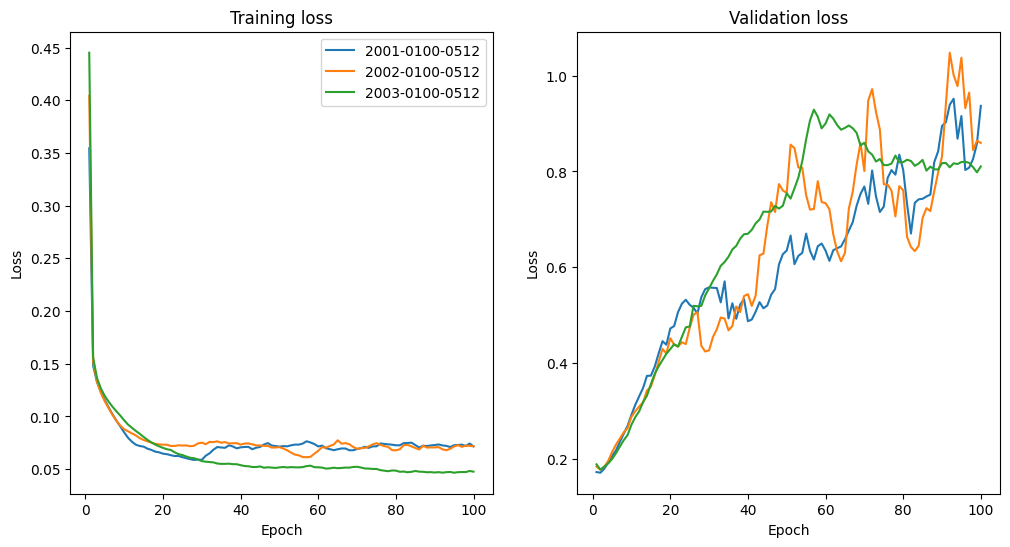

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

axs[0].set_title("Training loss")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
for key, value in data.items():
    sns.lineplot(ax=axs[0], x=x, y=value["loss"], label=key)

axs[1].set_title("Validation loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
for key, value in data.items():
    sns.lineplot(ax=axs[1], x=x, y=value["val_loss"])

# fig.supxlabel("Epoch")
# fig.supylabel("Loss")

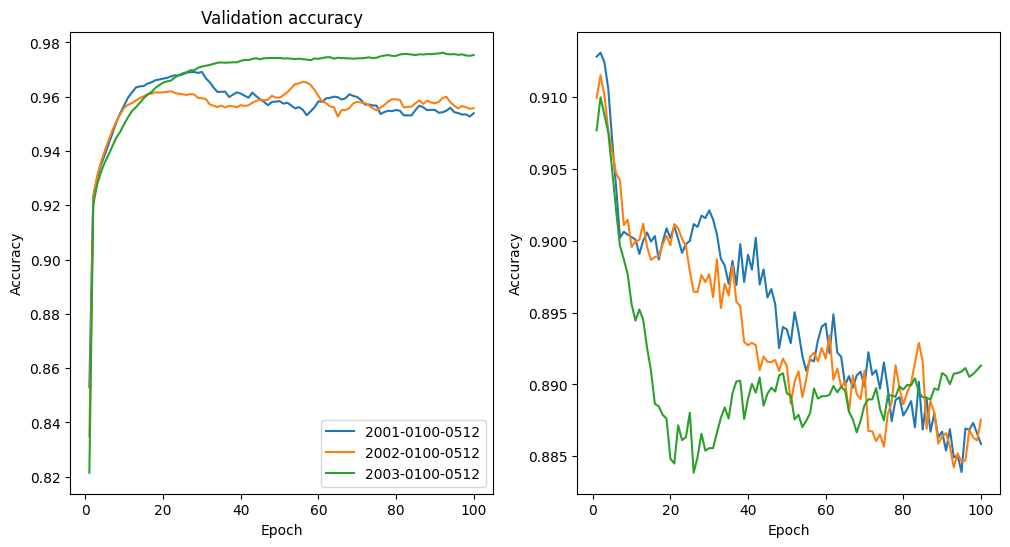

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

axs[0].set_title("Training accuracy")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Accuracy")
for key, value in data.items():
    sns.lineplot(ax=axs[0], x=x, y=value["accuracy"], label=key)

axs[0].set_title("Validation accuracy")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
for key, value in data.items():
    sns.lineplot(ax=axs[1], x=x, y=value["val_accuracy"])

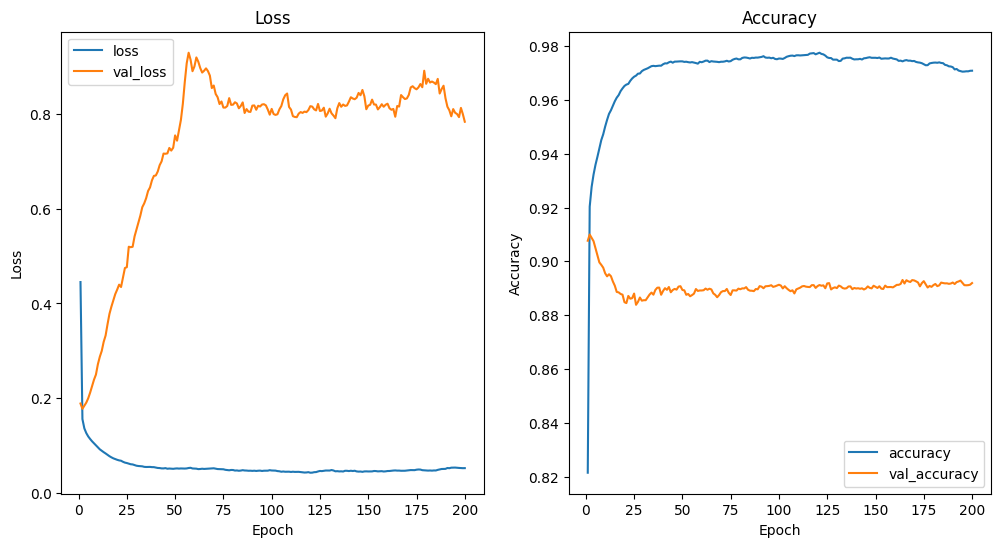

In [100]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

axs[0].set_title("Loss")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
for key in ("loss", "val_loss"):
    sns.lineplot(ax=axs[0], x=range(1, 201), y=data["2003-0200-0512"][key], label=key)

axs[1].set_title("Accuracy")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
for key in ("accuracy", "val_accuracy"):
    sns.lineplot(ax=axs[1], x=range(1, 201), y=data["2003-0200-0512"][key], label=key)

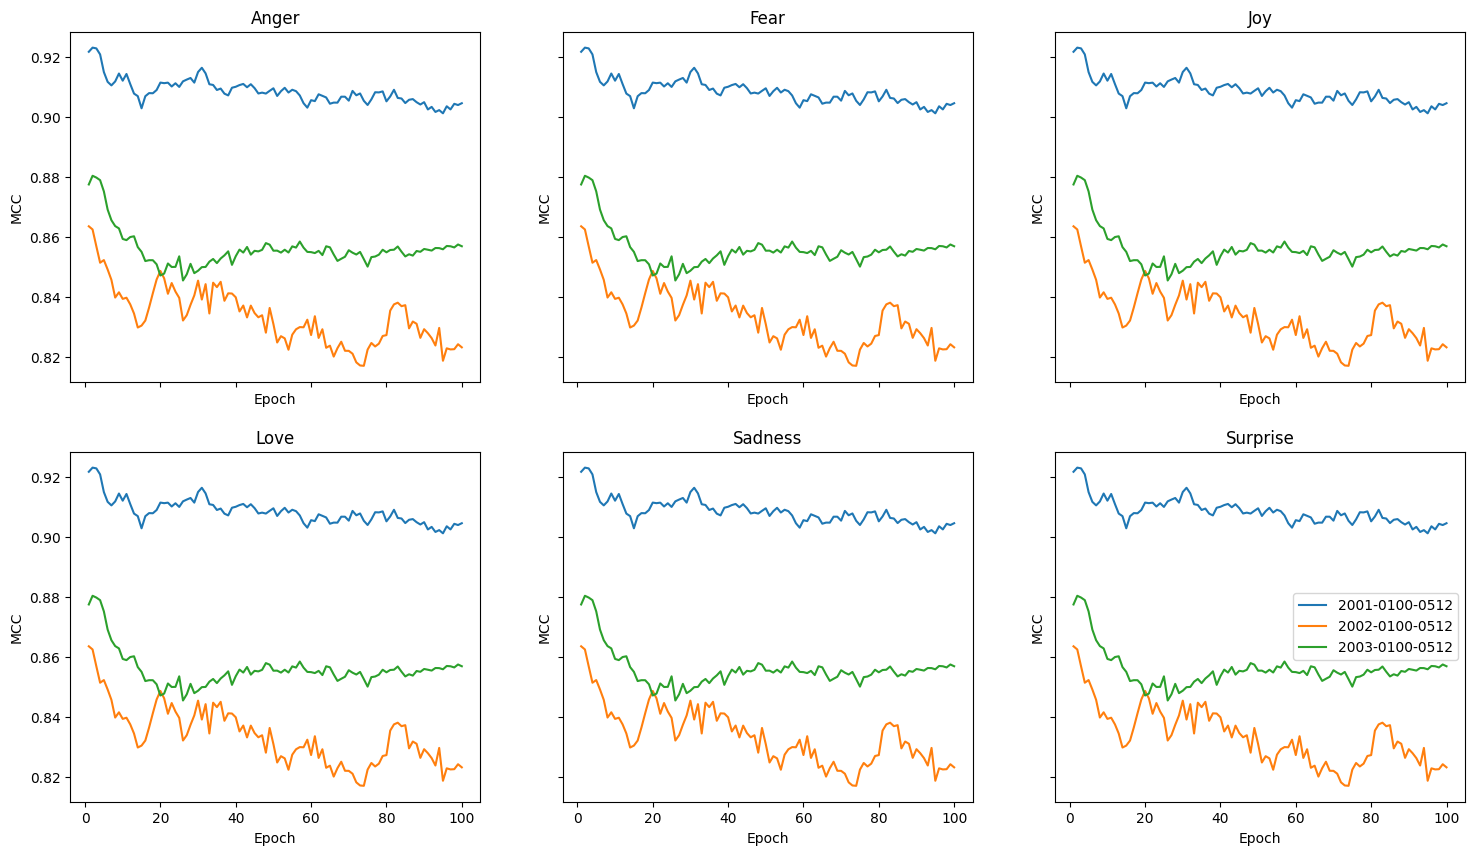

In [90]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

for i in range(6):
    ax = axs[i // 3][i % 3]
    for j, key in enumerate(data.keys()):
        ax.set_title(emotions[i].title())
        ax.set_xlabel("Epoch")
        ax.set_ylabel("MCC")
        sns.lineplot(ax=ax, x=x, y=data[key][f"val_mcc_{j}"], label=key if i == 5 else None)